<a href="https://colab.research.google.com/github/yenajo98/Amsterdam_housing_occupants/blob/main/ML_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
import pandas as pd
weekdays=pd.read_csv('/content/amsterdam_weekdays.csv')
weekdays

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [4]:
#Drop the unnamed column

weekdays = weekdays.drop(weekdays.columns[0], axis=1)
# Drop the specified columns
columns_to_drop = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']

weekdays = weekdays.drop(columns_to_drop, axis=1)

weekdays = weekdays.rename(columns={'realSum': 'Price'})
# Filter out boolean format variables
bool_cols = weekdays.select_dtypes(include=bool).columns

# Convert boolean variables to object variable type
weekdays[bool_cols] = weekdays[bool_cols].astype(str)


# Filter out boolean format variables
bool_cols = weekends.select_dtypes(include=bool).columns

# Convert boolean variables to object variable type
weekends[bool_cols] = weekends[bool_cols].astype(str)
weekdays.head()

In [9]:
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       1103 non-null   float64
 1   room_type                   1103 non-null   object 
 2   room_shared                 1103 non-null   object 
 3   room_private                1103 non-null   object 
 4   person_capacity             1103 non-null   float64
 5   host_is_superhost           1103 non-null   object 
 6   multi                       1103 non-null   int64  
 7   biz                         1103 non-null   int64  
 8   cleanliness_rating          1103 non-null   float64
 9   guest_satisfaction_overall  1103 non-null   float64
 10  bedrooms                    1103 non-null   int64  
 11  dist                        1103 non-null   float64
 12  metro_dist                  1103 non-null   float64
 13  lng                         1103 

# Analyzing the test variable (realSum)

In [11]:
weekdays['Price'].describe()

count    1103.000000
mean      545.020526
std       416.974314
min       128.887118
25%       309.797764
50%       430.248635
75%       657.324303
max      7782.907225
Name: Price, dtype: float64

We have an average price of €545.02 per night



 mu = 545.02 and sigma = 416.79



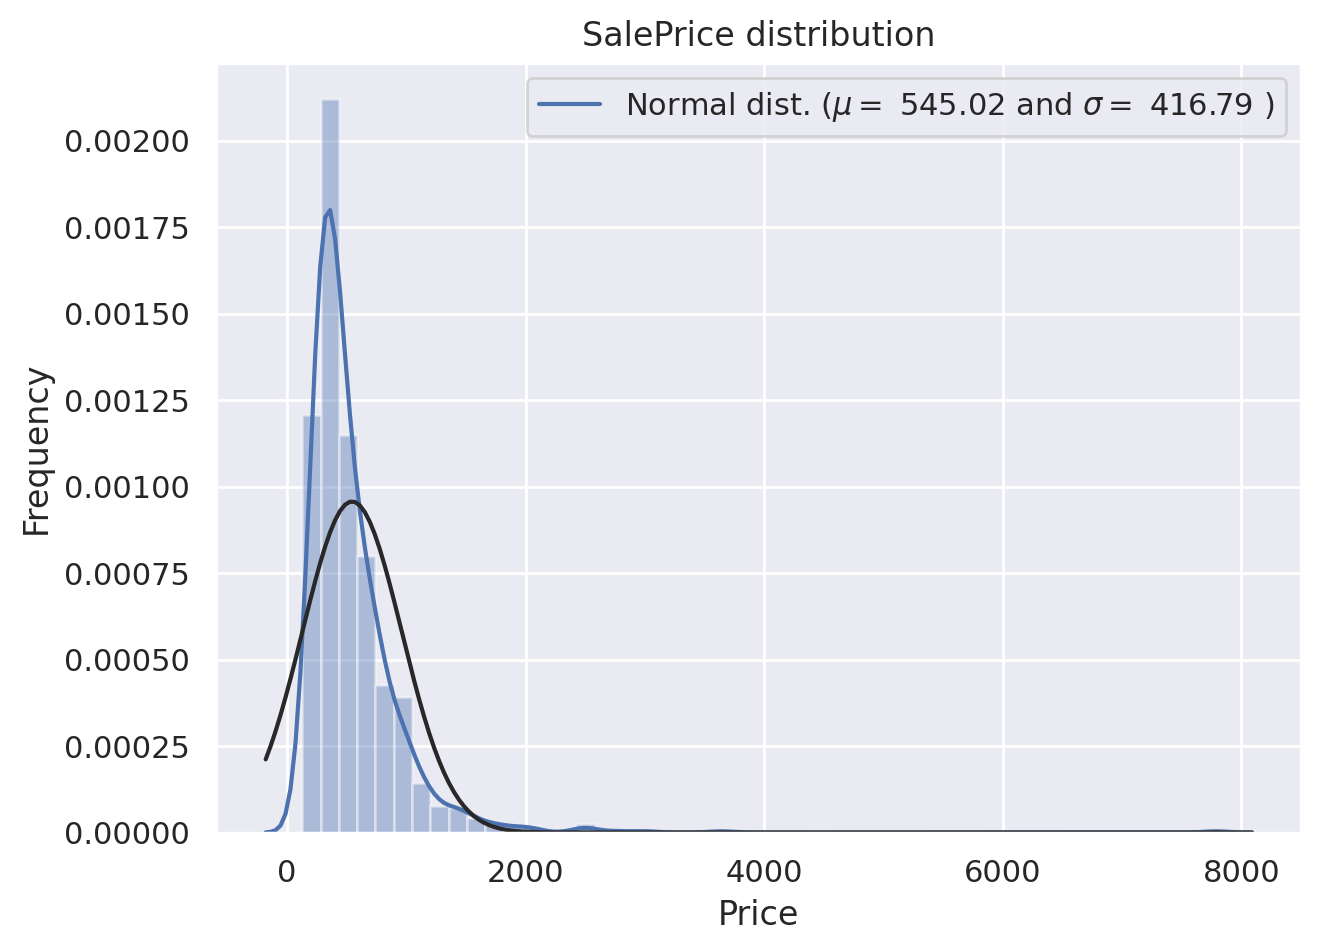

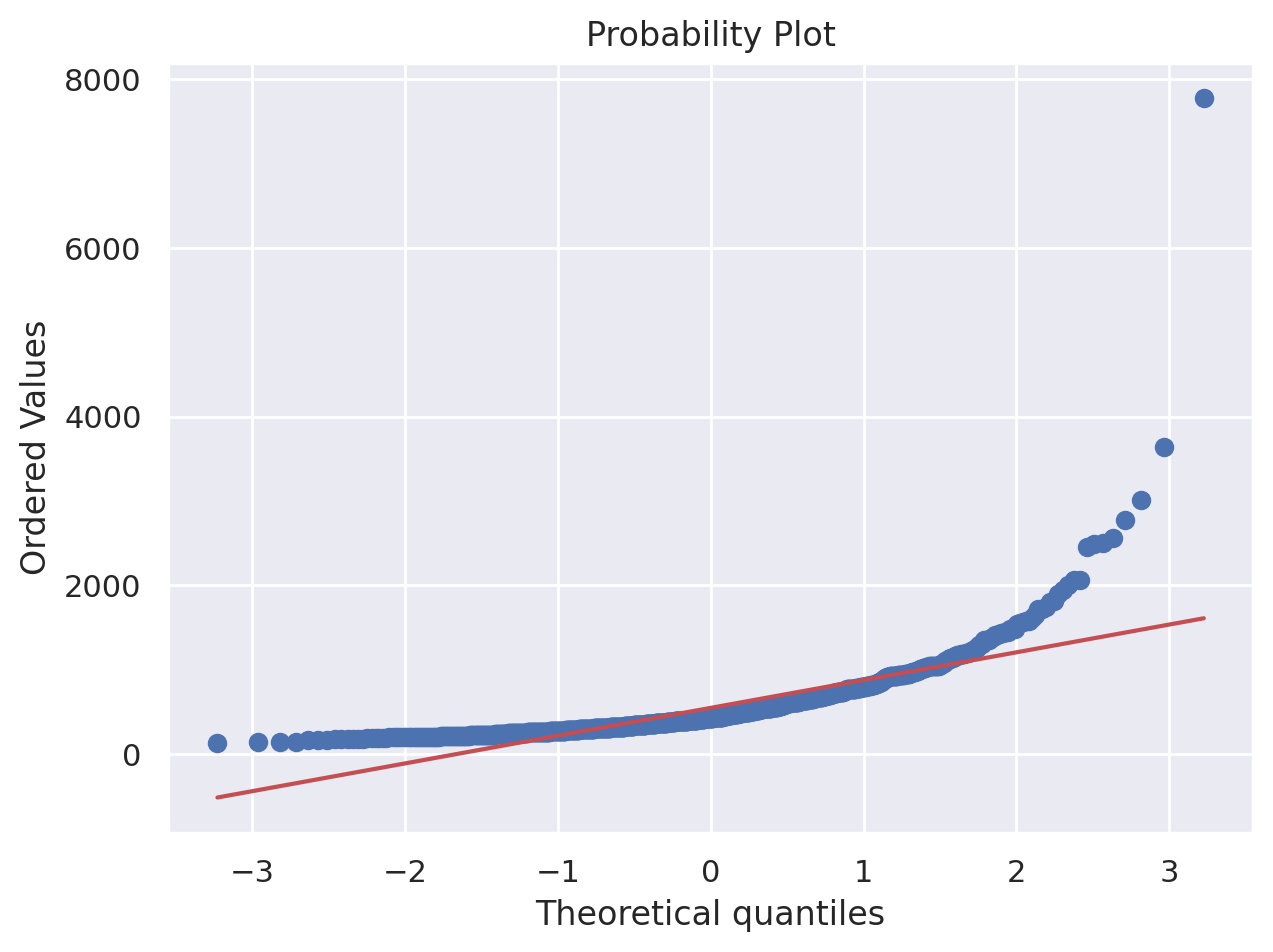

Skewness: 6.432379
Kurtosis: 88.040199


In [43]:
# Plot Histogram
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
sns.distplot(weekdays['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(weekdays['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(weekdays['Price'], plot=plt)
plt.show()

print("Skewness: %f" % weekdays['Price'].skew())
print("Kurtosis: %f" % weekdays['Price'].kurt())

Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution. Going to have to fix this later! We want our data to be as "normal" as possible.

## Multivariate analysis

In [13]:
# Checking Categorical Data
weekdays.select_dtypes(include=['object']).columns

Index(['room_type', 'room_shared', 'room_private', 'host_is_superhost'], dtype='object')

In [14]:
# Checking Numerical Data
weekdays.select_dtypes(include=['int64','float64']).columns

Index(['Price', 'person_capacity', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat'],
      dtype='object')

In [15]:
cat = len(weekdays.select_dtypes(include=['object']).columns)
num = len(weekdays.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  4 categorical + 11 numerical = 15 features


In [16]:
numeric = weekdays.select_dtypes(include=['int64','float64'])
numeric

,Price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
0,194.033698,2.0,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,344.245776,4.0,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,264.101422,2.0,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,433.529398,4.0,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,485.552926,2.0,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,2.0,0,0,10.0,100.0,1,2.375833,1.436054,4.85869,52.37677
1099,233.637194,2.0,1,0,10.0,90.0,1,4.719736,0.322263,4.83611,52.34910
1100,317.062311,2.0,1,0,10.0,92.0,1,0.598355,0.751993,4.88897,52.37798
1101,1812.855904,4.0,0,0,8.0,84.0,5,1.943020,0.388532,4.90688,52.35794


<Axes: >

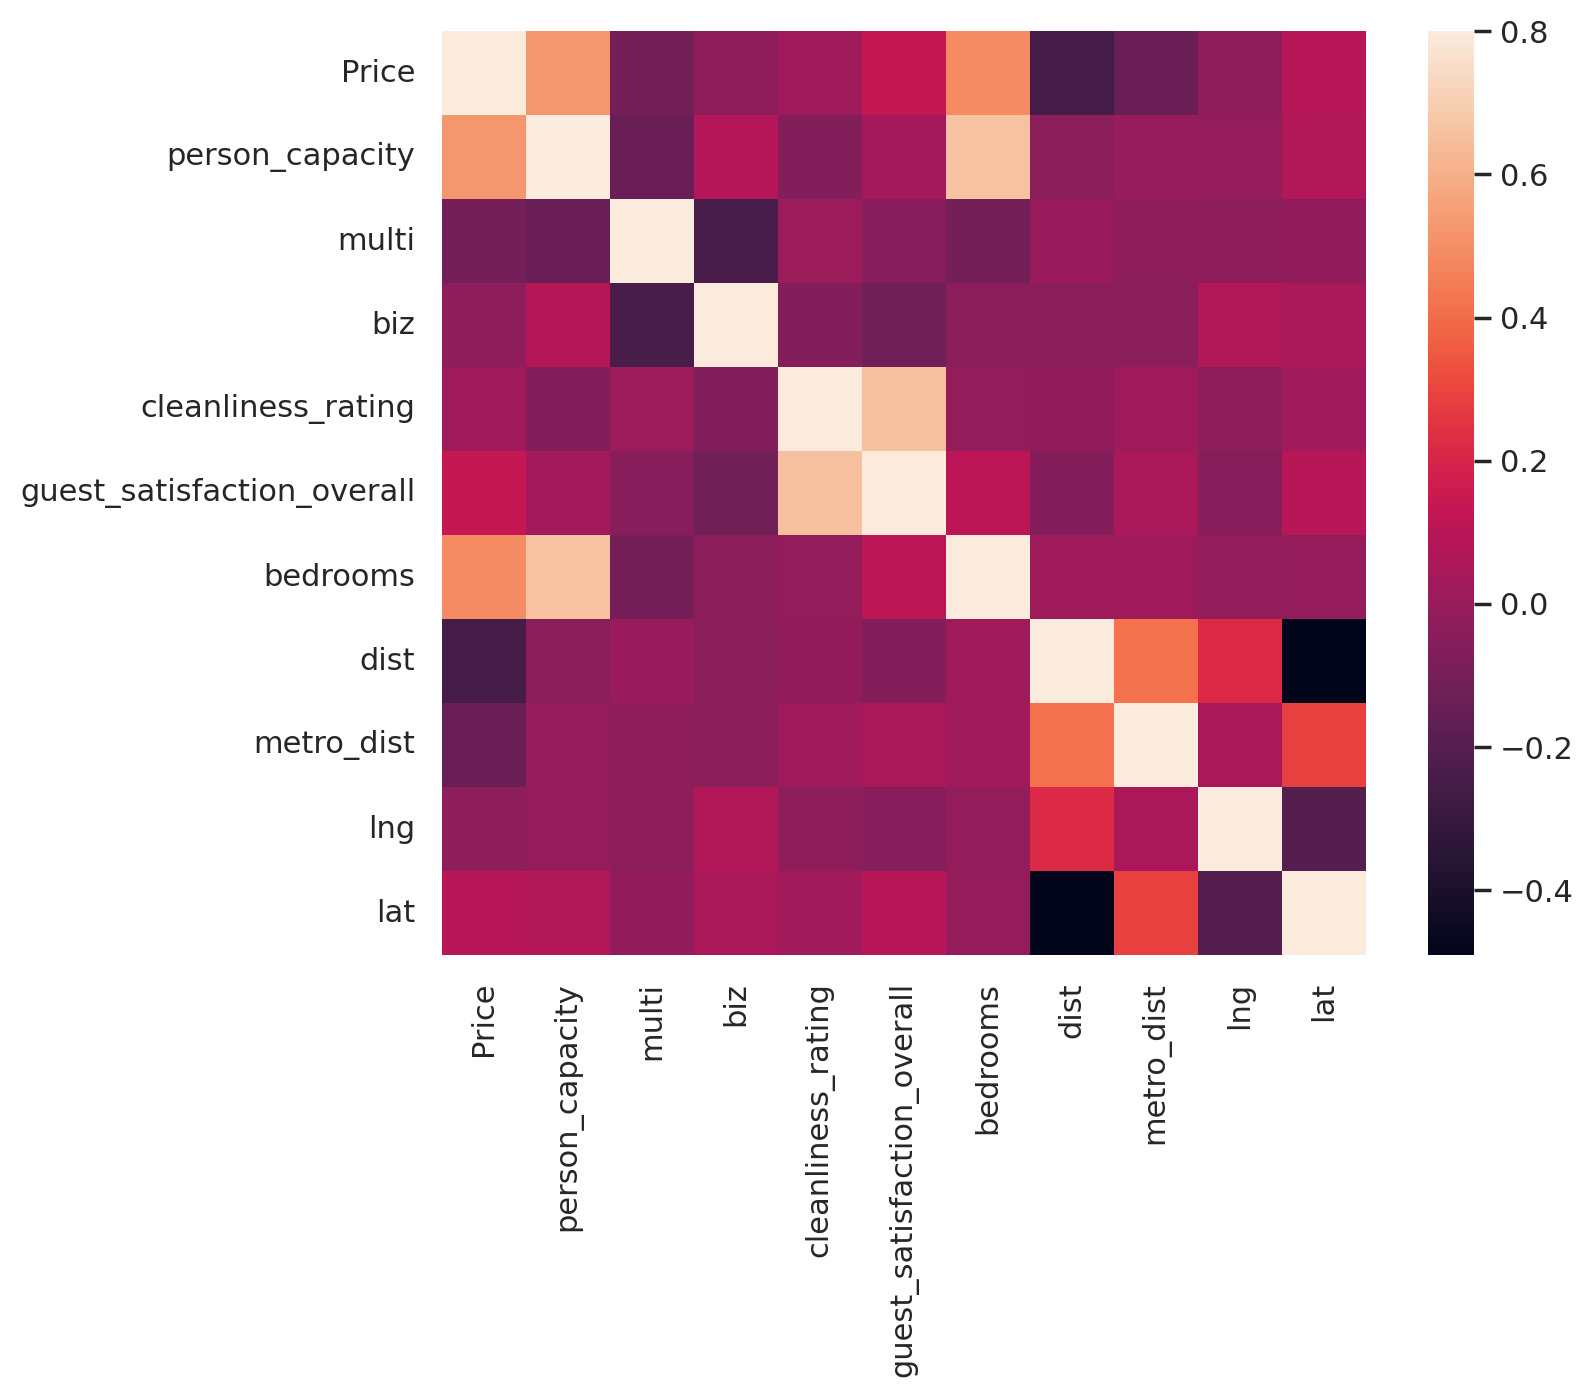

In [33]:
# Correlation Matrix Heatmap
corrmat = weekdays.corr()
f, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as per your desired size
sns.heatmap(corrmat, vmax=.8, square=True)


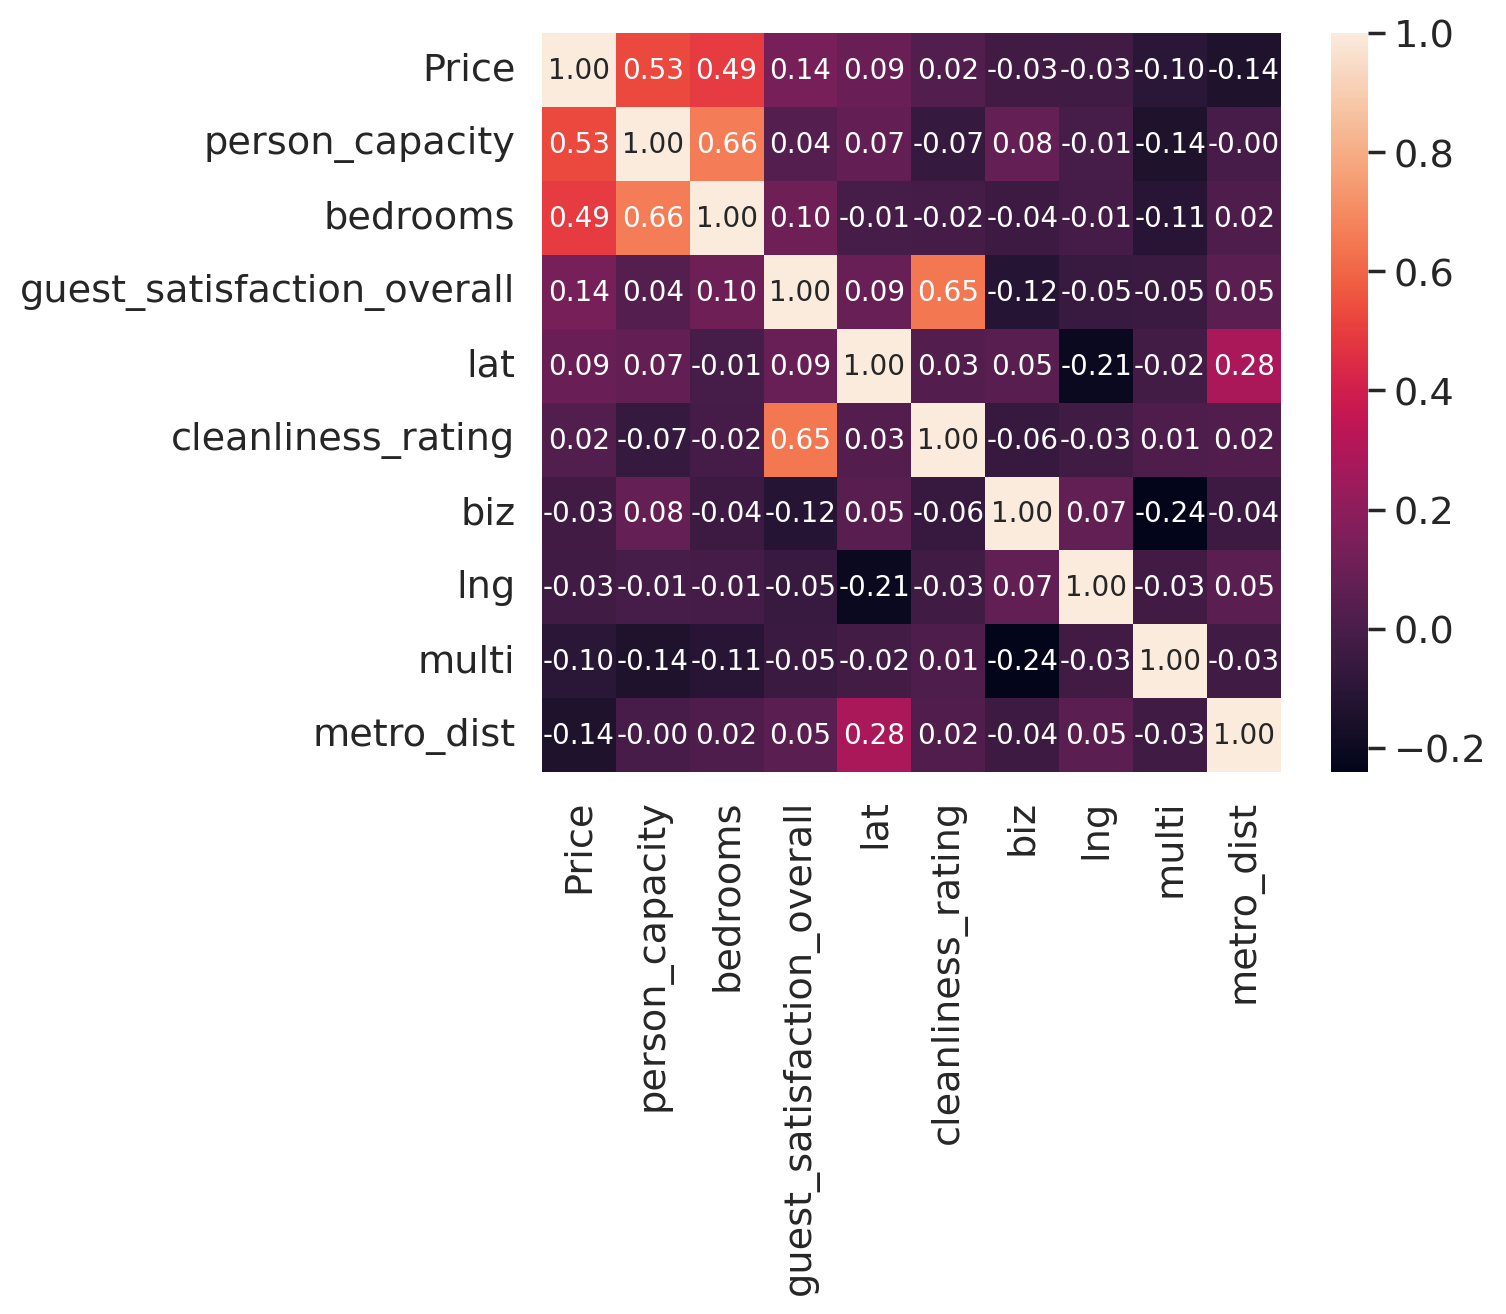

In [18]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(weekdays[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,Price
1,person_capacity
2,bedrooms
3,guest_satisfaction_overall
4,lat
5,cleanliness_rating
6,biz
7,lng
8,multi
9,metro_dist


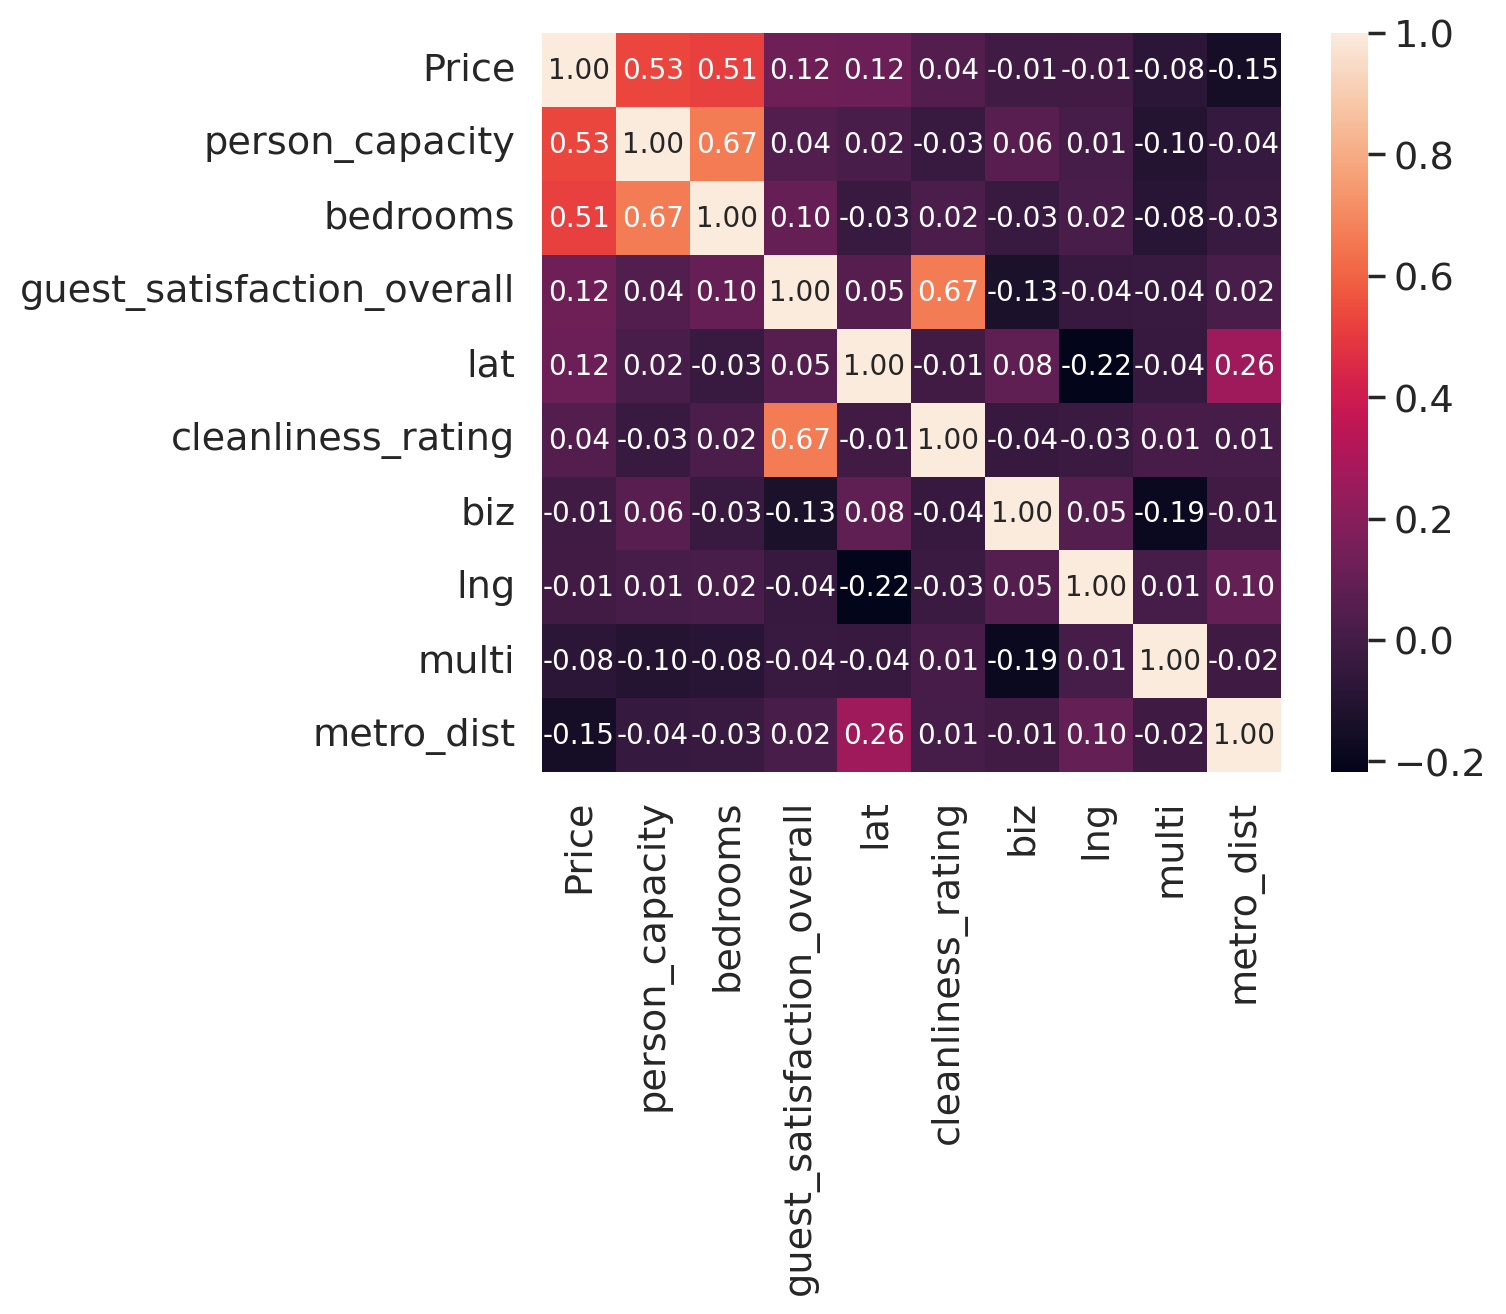

In [20]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(weekends[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [21]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,Price
1,person_capacity
2,bedrooms
3,guest_satisfaction_overall
4,lat
5,cleanliness_rating
6,biz
7,lng
8,multi
9,metro_dist


1. Price:
2. person_capacity:the maximum number of guests
3. bedrooms:number of bedrooms (0 for studios)
4. guest_satisfaction_overall:overall rating of the listing
5. lat:latitude of the listing location
6. cleanliness_rating: cleanliness rating
7. bis:dummy variable if the listing belongs to hosts with more than 4 offers
8. lng: longitude of the listing location
9. multi:dummy variable if the listing belongs to hosts with 2-4 offers
10. metro_dist:distance from nearest metro station in km

In [22]:
#Person capacity
weekdays.value_counts('person_capacity')

person_capacity
2.0    656
4.0    333
3.0     79
6.0     24
5.0     11
dtype: int64

[Text(0.5, 1.0, 'Prices in terms of persons capacity')]

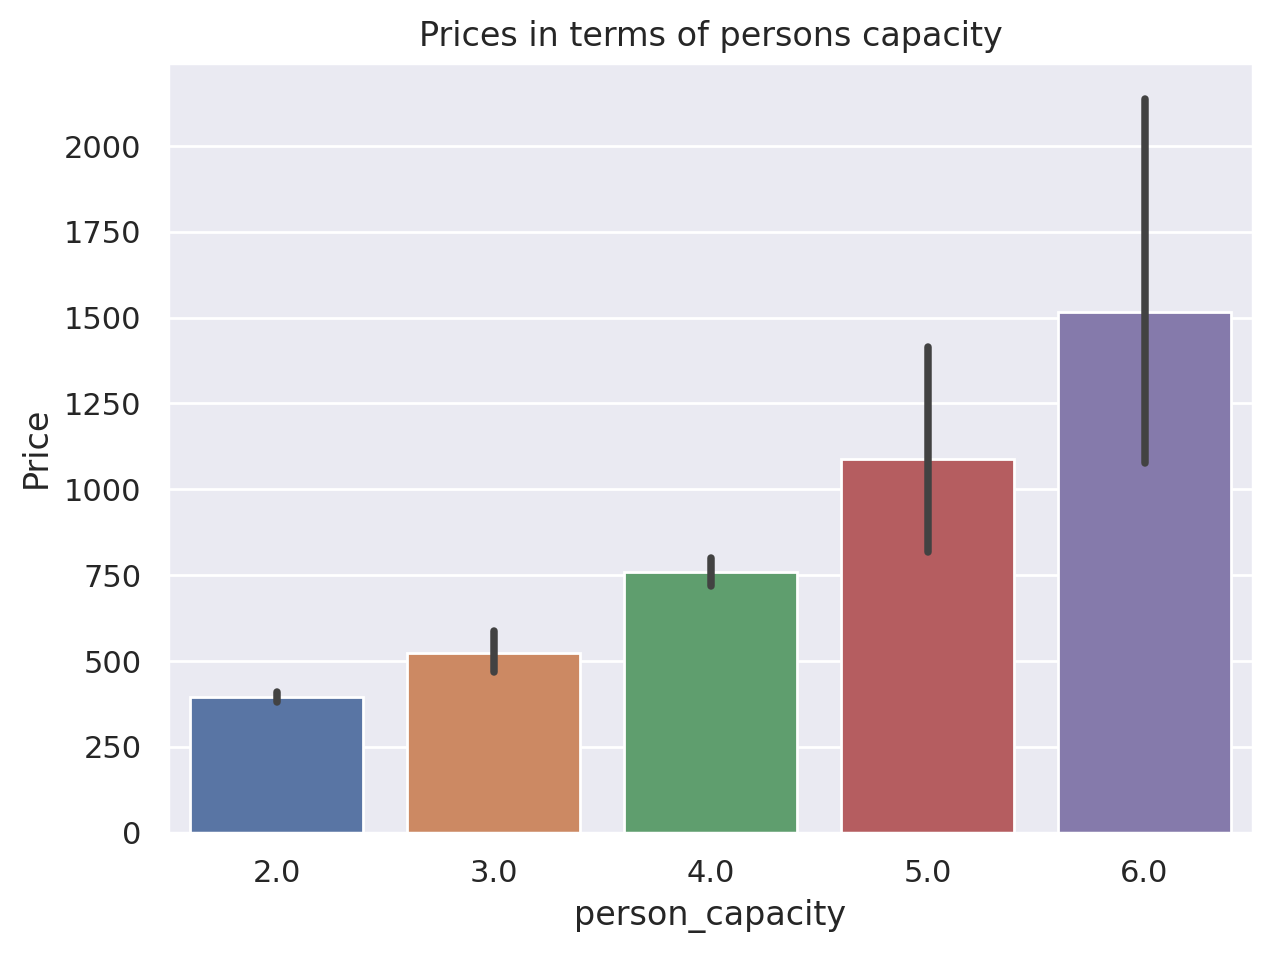

In [34]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = weekdays, x='person_capacity', y='Price').set(title='Prices in terms of persons capacity')

The higher the person capacity, the higher the price

In [24]:
# bedrooms
weekdays.value_counts('bedrooms')

bedrooms
1    719
2    218
0     83
3     74
4      7
5      2
dtype: int64

[Text(0.5, 1.0, 'Prices in terms of # of bedrooms')]

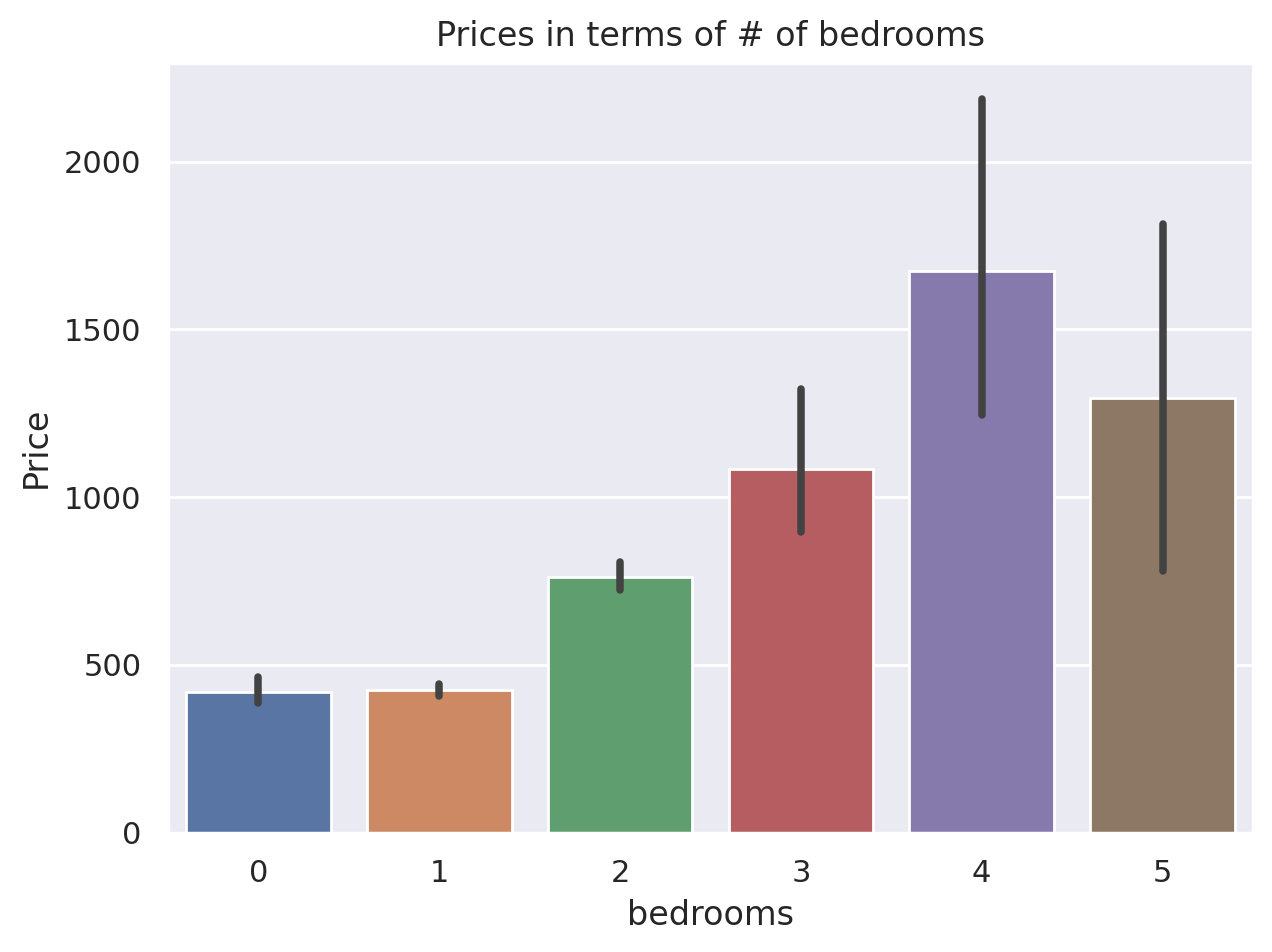

In [35]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = weekdays, x='bedrooms', y='Price').set(title='Prices in terms of # of bedrooms')

The price seems to be higher as the # of rooms increases. But not the case when the # of bedroom is more than 5. We may want to investigate this further.


Text(0.5, 1.0, 'Price vs guest_satisfaction_overall')

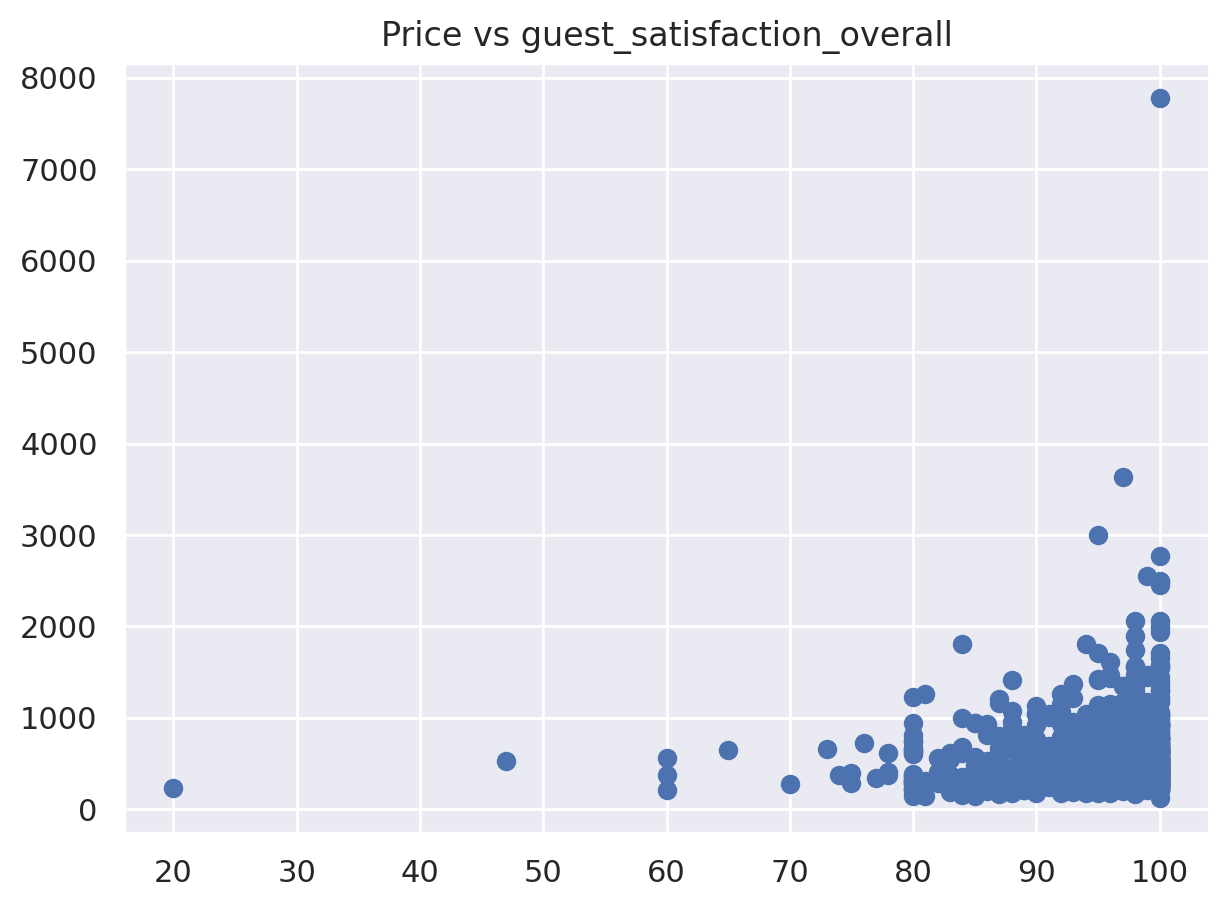

In [36]:
# guest_satisfaction_overall
plt.figure(figsize=(7, 5))
plt.scatter(weekdays.guest_satisfaction_overall,weekdays.Price)
plt.title("Price vs guest_satisfaction_overall")

There seem to be outliers (20, 8000). The higher the satisfaction, the higher the price seems like.

Text(0.5, 1.0, 'Price vs lat')

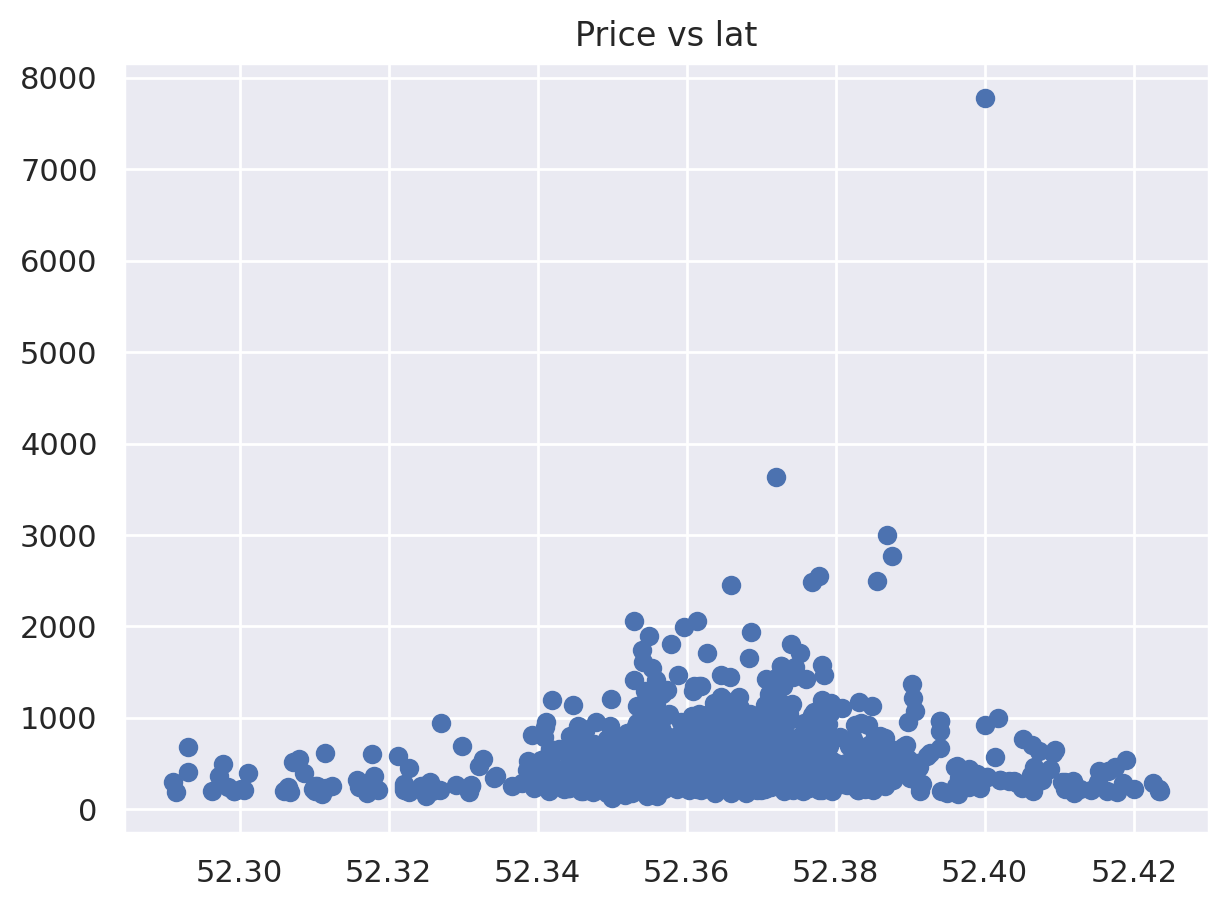

In [37]:
# latitude
plt.figure(figsize=(7, 5))
plt.scatter(weekdays.lat,weekdays.Price)
plt.title("Price vs lat")

There seem no correlation between the latitude and the price. However, most of the homes are located within 52.34 and 52.40.

In [28]:
weekdays.value_counts('cleanliness_rating')

cleanliness_rating
10.0    659
9.0     334
8.0      87
7.0      11
6.0       9
4.0       2
5.0       1
dtype: int64

[Text(0.5, 1.0, 'Prices in terms of cleanliness_rating')]

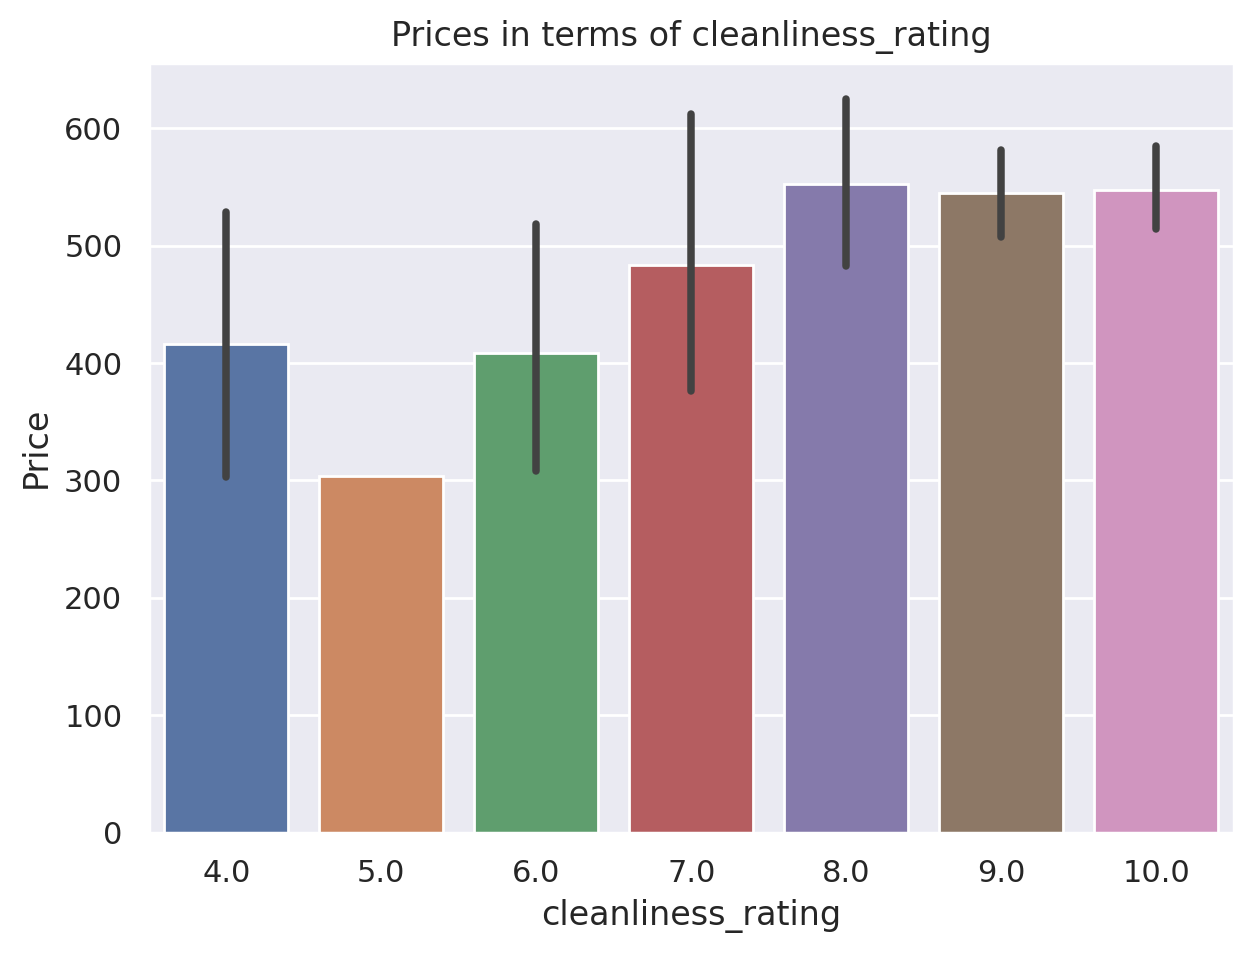

In [38]:
#cleanliness_rating
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = weekdays, x='cleanliness_rating', y='Price').set(title='Prices in terms of cleanliness_rating')

Although the room was not clean, the price seem to be high for less clean rooms. My assumption: may be the location is good?

In [30]:
# biz: belong to the host or not
weekdays.value_counts('biz')

biz
0    976
1    127
dtype: int64

Most of the rooms are belong to the host. 976 rooms.

Text(0.5, 1.0, 'Price vs lng')

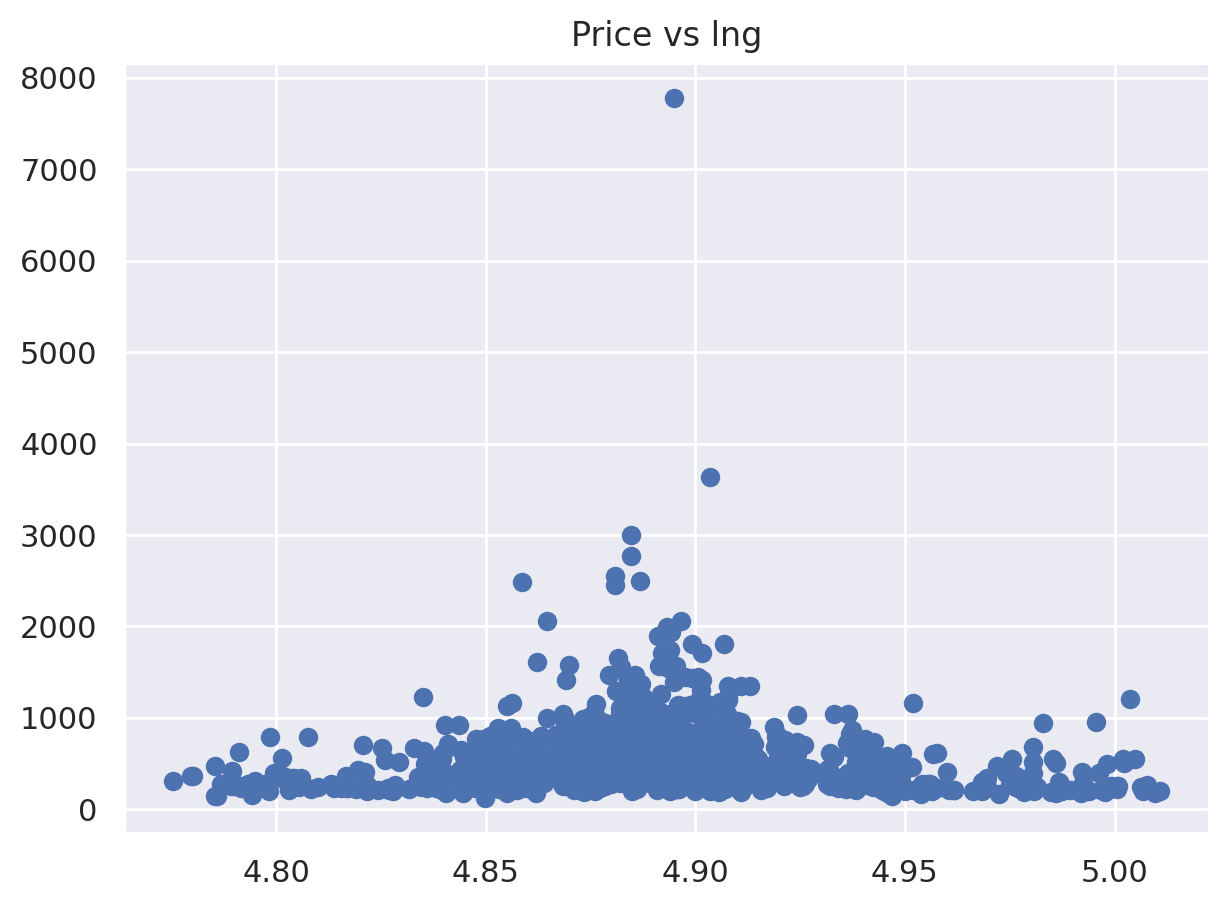

In [39]:
# longitude
plt.figure(figsize=(7, 5))
plt.scatter(weekdays.lng,weekdays.Price)
plt.title("Price vs lng")

Text(0.5, 1.0, 'Price vs metro_dist')

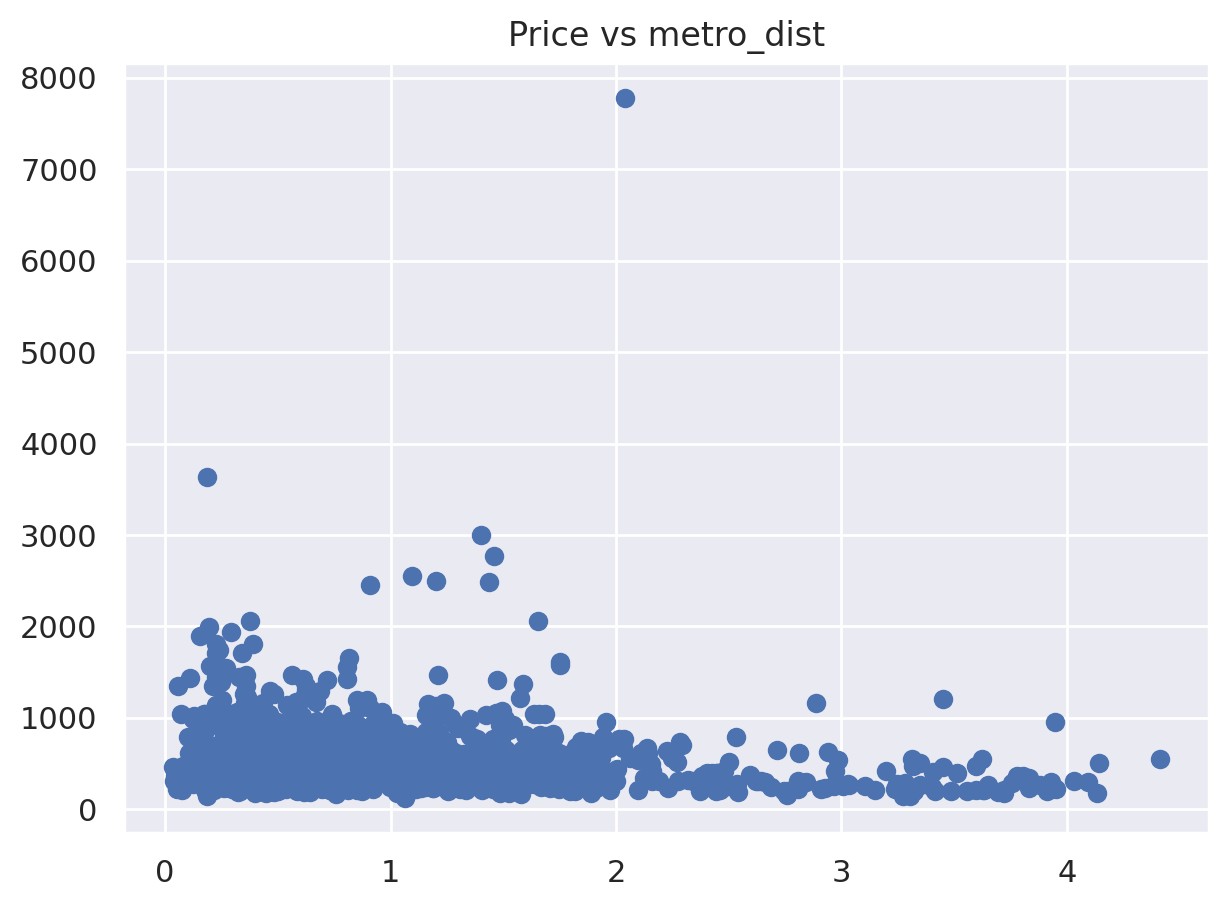

In [40]:
#metro_dist
plt.figure(figsize=(7, 5))
plt.scatter(weekdays.metro_dist,weekdays.Price)
plt.title("Price vs metro_dist")